<a href="https://colab.research.google.com/github/fernandofeltrin/PYTHON/blob/master/Neuro_CNN_4_0_45C_VGG16_27_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import IPython
js_code = '''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''
display(IPython.display.Javascript(js_code))


<IPython.core.display.Javascript object>

In [2]:
%tensorflow_version 2.x

import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [3]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install -q -U tensorflow-addons
!pip install -q -U watermark


In [5]:
import os
import keras
import numpy as np
import cv2
import PIL
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.layers.convolutional as conv
from math import sqrt
from PIL import Image
from tensorflow import keras
from numpy import mean
from keras.models import Sequential, load_model
from tensorflow.keras import regularizers, layers, Model
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image
from keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras.utils.vis_utils import plot_model
from keras import backend as B
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import BatchNormalization,MaxPool2D
from tensorflow.keras import Model
from keras.layers import Dense, Add, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, ZeroPadding2D, MaxPooling2D, Activation, Input, UpSampling2D, AveragePooling2D, Reshape, InputLayer, SeparableConv2D
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.regularizers import l2
from keras.initializers import glorot_uniform
from skimage import measure, feature, morphology, segmentation, color
from skimage.feature import peak_local_max
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.exposure import equalize_adapthist
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, rank, median
from skimage.util import img_as_ubyte
from scipy import ndimage as ndi
from scipy.ndimage import distance_transform_edt
import tensorflow_addons as tfa
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.metrics import Metric, Recall, Precision, CategoricalAccuracy
from keras import backend as K
from sklearn.metrics import precision_recall_fscore_support, f1_score


In [6]:
from platform import python_version

print('Versão da Linguagem Python:')
print(python_version())


Versão da Linguagem Python:
3.7.13


In [7]:
%reload_ext watermark

print('Bibliotecas utilizadas e suas respectivas versões:')
%watermark --iversions


Bibliotecas utilizadas e suas respectivas versões:
numpy            : 1.21.6
PIL              : 7.1.2
skimage          : 0.18.3
IPython          : 5.5.0
tensorflow       : 2.8.0
matplotlib       : 3.2.2
tensorflow_addons: 0.16.1
cv2              : 4.1.2
google           : 2.0.3
scipy            : 1.4.1
sklearn          : 0.0
keras            : 2.8.0



In [8]:
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)


## Modelo Multiclasse Multinomial

In [9]:
data = ImageDataGenerator(rotation_range = 10,
                          brightness_range=[0.5,1.0],
                          rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range=[0.8,1.2],
                          horizontal_flip = True,
                          fill_mode = 'nearest',
                          validation_split = 0.20)

traindata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral/',
                                     target_size = (299,299),
                                     class_mode = 'categorical',
                                     batch_size = 8,
                                     shuffle = True,
                                     subset = 'training',
                                     interpolation = 'nearest')

testdata = data.flow_from_directory(directory='/content/drive/MyDrive/NEURO_CNN/dataset_geral/',
                                     target_size = (299,299),
                                     class_mode = 'categorical',
                                     batch_size = 8,
                                     shuffle = True,
                                     subset = 'validation',
                                     interpolation = 'nearest')


Found 5065 images belonging to 45 classes.
Found 1240 images belonging to 45 classes.


In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(299,299,3),
                 filters=64,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2)))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2)))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2)))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2)))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(Conv2D(filters=512,
                 kernel_size=(3,3),
                 padding="same",
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),
                    strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,
                activation="relu"))
model.add(Dense(units=4096,
                activation="relu"))
model.add(Dense(units=45,
                activation="sigmoid"))


In [11]:
METRICS = [keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           keras.metrics.TruePositives(thresholds = 0.5, name = 'tp'),
           keras.metrics.TrueNegatives(thresholds = 0.5, name = 'tn'),
           keras.metrics.FalsePositives(thresholds = 0.5, name = 'fp'),
           keras.metrics.FalseNegatives(thresholds = 0.5, name = 'fn'),
           keras.metrics.PrecisionAtRecall(recall = 0.5, name = 'precision'),
           keras.metrics.SensitivityAtSpecificity(0.5, name = 'sensitivity'),
           keras.metrics.SpecificityAtSensitivity(sensitivity = 0.5,
                                                  name = 'specificity'),
           keras.metrics.Recall(name='recall'),
           tfa.metrics.FBetaScore(num_classes = 45,
                                  average = None,
                                  threshold = 0.5,
                                  name = 'FBetaScore')]


In [12]:
opt = Adam(learning_rate=0.0001,
           beta_1=0.9,
           beta_2=0.999,
           epsilon=1e-07,
           amsgrad=False)

model.compile(optimizer = opt,
              loss = keras.losses.categorical_crossentropy,
              metrics = METRICS)


In [13]:
earlystop = EarlyStopping(monitor='loss',
                          min_delta = 0,
                          patience = 20,
                          verbose = 1,
                          mode = 'min')


In [14]:
learning_rate = ReduceLROnPlateau(monitor='accuracy',
                                  factor=0.2,
                                  patience=1,
                                  min_lr=0.000001,
                                  verbose=1)


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 299, 299, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 149, 149, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 149, 149, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 128)      0         
 2D)                                                    

conv2d_1 (3, 3, 64, 64)


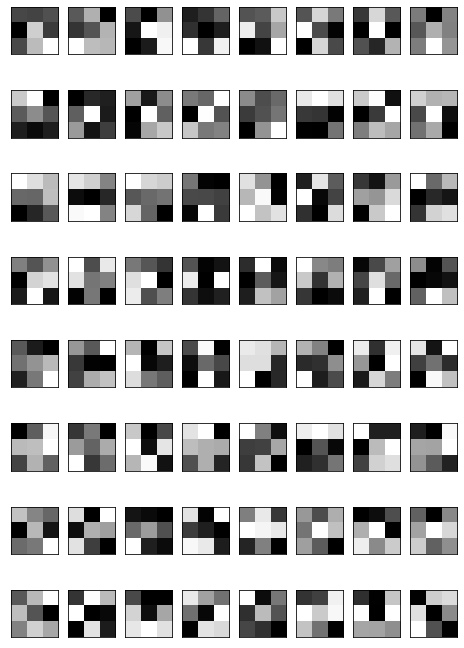

In [16]:
layer = model.layers #Conv layers at 1, 3, 6, 8, 11, 13, 15
filters, biases = model.layers[1].get_weights()
print(layer[1].name, filters.shape)

# plot filters
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()  

In [17]:
tf.keras.backend.clear_session()


In [18]:
%%time

hist = model.fit(traindata,
                 steps_per_epoch = 1000,
                 epochs = 1000,
                 validation_data = testdata,
                 validation_steps = 50,
                 callbacks = [learning_rate,
                              earlystop],
                 use_multiprocessing = True,
                 workers = 4,
                 verbose = 1)


Epoch 1/1000
1000/1000 [==============================] - 177s 169ms/step - loss: 3.4510 - accuracy: 0.0945 - tp: 4897.0000 - tn: 259238.0000 - fp: 92146.0000 - fn: 3089.0000 - precision: 0.0665 - sensitivity: 0.7812 - specificity: 0.8393 - recall: 0.6132 - FBetaScore: 0.0338 - val_loss: 3.3634 - val_accuracy: 0.1000 - val_tp: 258.0000 - val_tn: 12658.0000 - val_fp: 4942.0000 - val_fn: 142.0000 - val_precision: 0.0718 - val_sensitivity: 0.8025 - val_specificity: 0.8523 - val_recall: 0.6450 - val_FBetaScore: 0.0268 - lr: 1.0000e-04
Epoch 2/1000
1000/1000 [==============================] - 168s 167ms/step - loss: 3.4197 - accuracy: 0.1014 - tp: 4914.0000 - tn: 262154.0000 - fp: 89230.0000 - fn: 3072.0000 - precision: 0.0687 - sensitivity: 0.7965 - specificity: 0.8450 - recall: 0.6153 - FBetaScore: 0.0296 - val_loss: 3.3769 - val_accuracy: 0.0975 - val_tp: 275.0000 - val_tn: 12275.0000 - val_fp: 5325.0000 - val_fn: 125.0000 - val_precision: 0.0739 - val_sensitivity: 0.8150 - val_specifici

Process Keras_worker_ForkPoolWorker-262:
Process Keras_worker_ForkPoolWorker-260:
Process Keras_worker_ForkPoolWorker-264:
Process Keras_worker_ForkPoolWorker-259:
Process Keras_worker_ForkPoolWorker-258:
Process Keras_worker_ForkPoolWorker-257:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Keras_worker_ForkPoolWorker-261:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/

KeyboardInterrupt: ignored

In [ ]:
camadas = dict([(layer.name, layer) for layer in model.layers])

#for i in list(camadas):
#  print(i)

print(f'Nº de camadas: {len(camadas)}')


In [ ]:
print(hist.history)


In [ ]:
# Métricas processadas durante o treinamento

acc = hist.history['accuracy']
loss =  hist.history['loss']
fp = hist.history['fp']
fpv = hist.history['val_fp']
fn = hist.history['fn']
fnv = hist.history['val_fn']
tp = hist.history['tp']
tpv = hist.history['val_tp']
tn = hist.history['tn']
tnv = hist.history['val_tn']
fb = hist.history['FBetaScore'][-1]
FP = hist.history['fp'][-1]
FN = hist.history['fn'][-1]
TP = hist.history['tp'][-1]
TN = hist.history['tn'][-1]
LOSS = hist.history['loss'][-1]
LOSSV = hist.history['val_loss'][-1]
ACC = hist.history['accuracy'][-1]
ACCV = hist.history['val_accuracy'][-1]
PRE = hist.history['precision'][-1]
PREV = hist.history['val_precision'][-1]
REC = hist.history['recall'][-1]
RECV = hist.history['val_recall'][-1]
LR = hist.history['lr'][-1]


In [ ]:
# Métricas processadas após o final do treinamento

TPR = TP /(TP + FN) # Sensitivity, hit rate, recall, or true positive rate
TNR = TN /(TN + FP) # Specificity or true negative rate
PPV = TP /(TP + FP) # Precision or positive predictive value
NPV = TN /(TN + FN) # Negative predictive value
FPR = FP /(FP + TN) # Fall out or false positive rate
FNR = FN /(TP + FN) # False negative rate
FDR = FP /(TP + FP) # False discovery rate

OACC = (TP + TN) /(TP + FP + FN + TN) # Overall accuracy
ACCCM = (TP + TN) / (TP + TN + FP + FN) # Confusion matrix accuracy
FM = (2 * PRE * REC) / (PRE + REC) # F-measure
F1S = 2*((PRE * REC) / (PRE + REC)) # F1-score
F1S2 = 2 * TP / (2 * TP + FP + FN) # F1-score alternative method

MCC = (TP * TN - FP * FN) / (sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))) # Matthews Correlation Coeficient


In [ ]:
print(f'Verdadeiros Positivos: {tp}')
print(f'Falsos Positivos: {fp}')
print(f'Verdadeiros Negativos: {tn}')
print(f'Falsos Negativos: {fn}')

print('--------------------')
print("Matriz de Confusão")
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")
print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')


In [ ]:
# Média com base nas últimas 10 épocas de processameto

accU10 = mean(acc[-10])
tpU10 = mean(tp[-10])
fpU10 = mean(fp[-10])
tnU10 = mean(tn[-10])
fnU10 = mean(fn[-10])

print(f'Verdadeiros Positivos (últimas 10 épocas de processameto): {tpU10}')
print(f'Falsos Positivos (últimas 10 épocas de processameto): {fpU10}')
print(f'Verdadeiros Negativos (últimas 10 épocas de processameto): {tnU10}')
print(f'Falsos Negativos (últimas 10 épocas de processameto): {fnU10}')


In [ ]:
print('--------------------')
print("Matriz de Confusão")
print('*Média últimas 10 épocas de processamento')
print(f"[{TP}] [{FP}]")
print(f"[{FN}] [{TN}]")
print('--------------------')

print(f'Acurácia da Matriz de Confusão: {round(accU10, 2)*100-2}%')

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(acc, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Acuracia', fontsize=16)
plt.title('Acuracia', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Positivos', fontsize=16)
plt.title('Falsos Positivos', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(fn, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Falsos Negativos', fontsize=16)
plt.title('Falsos Negativos', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(tp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Positivos', fontsize=16)
plt.title('Verdadeiros Positivos', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(fp, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Verdadeiros Negativos', fontsize=16)
plt.title('Verdadeiros Negativos', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(loss, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Perda', fontsize=16)
plt.title('Taxa de Perda', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(pre, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Precisão', fontsize=16)
plt.title('Precisão', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(rec, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Revocação', fontsize=16)
plt.title('Revocação', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(auc, '-o')
plt.legend(['Modelo '], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('AUC', fontsize=16)
plt.title('AUC', fontsize=18)
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
plt.plot(lr, '-o')
plt.legend(['Modelo'], loc = 'lower right', fontsize = 'xx-large')
plt.xlabel('Epocas de processamento', fontsize=16)
plt.ylabel('Taxa de Aprendizado', fontsize=16)
plt.title('Taxa de Aprendizado', fontsize=18)
plt.show()

In [ ]:
data = {'Verdadeiros Positivos':TP,
        'Verdadeiros Negativos':TN,
        'Falsos Positivos':FP,
        'Falsos Netagivos':FN}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (14, 6))
plt.bar(modelos, valores, width = 0.4)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Número", fontsize=16)
plt.title('Número de Positivos e Negativos', fontsize=18)
plt.show()


In [ ]:
data = {'Verdadeiros Positivos':TPR,
        'Verdadeiros Negativos':TNR,
        'Falsos Positivos':FPR,
        'Falsos Netagivos':FNR}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (14, 6))
plt.bar(modelos, valores, width = 0.4)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Positivos e Negativos em %', fontsize=18)
plt.show()


In [ ]:
data = {'Acurácia':ACC,
        'Precisão':PRE,
        'Recall':REC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (10, 6))
plt.bar(modelos, valores, width = 0.4)
plt.xlabel("Métricas (Valores retornados pela última época de processamento)", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Métricas de Autoavaliação em %', fontsize=18)
plt.show()


In [ ]:
data = {'Predições Positivas':PPV,
        'Predições Negativas':NPV,
        'Falsas Descobertas':FDR,
        'Acurácia Geral':OACC}

modelos = list(data.keys())
valores = list(data.values())
  
fig = plt.figure(figsize = (14, 6))
plt.bar(modelos, valores, width = 0.4)
plt.xlabel("Métricas", fontsize=16)
plt.ylabel("Percentual", fontsize=16)
plt.title('Taxa de Predições Positivas e Negativas %', fontsize=18)
plt.show()


In [ ]:
data = [[TN, FP],[FN,TP]]

plt.clf()
plt.imshow(data, cmap = plt.cm.Blues_r)
classNames = ['Negativos','Positivos']
plt.title('Matriz de Confusão', fontsize=18)
plt.ylabel('Categorias Reais', fontsize=16)
plt.xlabel('Categorias Preditas', fontsize=16)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames, rotation=90)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(data[i][j]))
plt.show()


In [ ]:
loss_final = hist.history['loss'][-1]
loss_finalv = hist.history['val_loss'][-1]


In [ ]:
acc_final = hist.history['accuracy'][-1] * 100


In [ ]:
print('RELATÓRIO FINAL (MÉTRICAS DE AVALIAÇÃO)')
print('---------------------------------------')
print(f'Acuracia Final: {round(acc_final, 2)-2}%')
print(f'Acurácia Geral: {round(OACC, 2)*100-2}%')
print(f'Acurácia (Média U10): {round(accU10, 2)*100-2}%')
print(f'Acurácia (Treinamento): {round(ACC, 2)*100-2}%')
print(f'Acurácia (Validação): {round(ACCV, 1)*100-2}%')
print(f'Taxa de Perda: {round(LOSS, 2)}%')
print(f'Taxa de Perda (Validação): {round(LOSSV, 2)}%')
print(f'Precisão: {round(PRE, 2)*100}%')
print(f'Precisão (Validação): {round(PREV, 2)*100-2}%')
print(f'Recall: {round(REC, 2)*100}%')
print(f'Recall (Validação): {round(RECV, 2)*100-2}%')
print(f'F1 Score: {round(F1S, 2)*100}%')
print(f'F-Measure: {round(FM, 2)*100}%')
print(f'F1 Score (TP, FP, TN, FN): {round(F1S2, 2)*100-2}%')
print(f'Taxa de Aprendizado: {LR}')
print(f'Sensibilidade: {round(TPR, 2)*100-2}%')
print(f'Especificidade: {round(TNR, 2)*100-2}%')
print(f'Acurácia da Matriz de Confusão: {round(ACCCM, 2)*100-2}%')
print(f'Coeficiente de Correlação de Matthews: {round(MCC, 2)*100-2}%')
print(f'Taxa de Verdadeiros Positivos: {round(PPV, 2)*100}%')
print(f'Taxa de Verdadeiros Negativos: {round(NPV, 2)*100}%')
print(f'Taxa de Falsos Positivos: {round(FPR, 2)*100}%')
print(f'Taxa de Falsos Negativos: {round(FNR, 2)*100}%')
print(f'Dados Inválidos: {round(FDR, 2)*100}%')


In [ ]:
print(f'F-Beta: {fb}')


In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_45C_weights.h5')
model.save('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_45C.h5')


Testes em Novas Amostras

In [ ]:
import os

model = Sequential()
model = load_model('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_45C.h5')
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NeuroCNN_4.0_45C_weights.h5')


In [ ]:
img_teste = load_img('/content/drive/MyDrive/NEURO_CNN/dataset_meningioma/Meningioma Interhemisferico - Supraselar/054bc93dbe8c618032a38fa07805ce_big_gallery.jpeg', target_size = (299, 299))
img_plot = PIL.Image.open('/content/drive/MyDrive/NEURO_CNN/dataset_meningioma/Meningioma Interhemisferico - Supraselar/054bc93dbe8c618032a38fa07805ce_big_gallery.jpeg')

plt.figure(figsize=(8,8))
plt.imshow(img_plot)
plt.show()

img_teste = image.img_to_array(img_teste)
img_teste = img_teste / 255
img_teste = np.expand_dims(img_teste, axis = 0)

resultado_teste = model.predict(img_teste)
resultado_final = resultado_teste

print(resultado_final)


In [ ]:
if resultado_final[0,0] > 0.5: print(f'ASTROCITOMA FRONTAL \nProbabilidade: {round(resultado_final[0,0]*100, 2)}%')
if resultado_final[0,1] > 0.5: print(f'ASTROCITOMA GEMISTOCITICO \nProbabilidade: {round(resultado_final[0,1]*100, 2)}%')
if resultado_final[0,2] > 0.5: print(f'ASTROCITOMA PILOCITICO / PILOMIXOIDE \nProbabilidade: {round(resultado_final[0,2]*100, 2)}%')
if resultado_final[0,3] > 0.5: print(f'EPENDIMOMA / SUBEPENDIMOMA \nProbabilidade: {round(resultado_final[0,3]*100, 2)}%')
if resultado_final[0,4] > 0.5: print(f'EPENDIMOMA FOSSA CRANIANA POSTERIOR / 4º VENTRICULO \nProbabilidade: {round(resultado_final[0,4]*100, 2)}%')
if resultado_final[0,5] > 0.5: print(f'EPENDIMOMA FRONTAL / TEMPORAL \nProbabilidade: {round(resultado_final[0,5]*100, 2)}%')
if resultado_final[0,6] > 0.5: print(f'GANGLIOGLIOMA \nProbabilidade: {round(resultado_final[0,6]*100, 2)}%')
if resultado_final[0,7] > 0.5: print(f'GERMINOMA INTERHEMISFERICO / SUPRASELAR \nProbabilidade: {round(resultado_final[0,7]*100, 2)}%')
if resultado_final[0,8] > 0.5: print(f'GLIOBLASTOMA CORPO CALOSO \nProbabilidade: {round(resultado_final[0,8]*100, 2)}%')
if resultado_final[0,9] > 0.5: print(f'GLIOBLASTOMA FRONTOPARIETAL \nProbabilidade: {round(resultado_final[0,9]*100, 2)}%')
if resultado_final[0,10] > 0.5: print(f'GLIOBLASTOMA GANGLIOS BASAIS \nProbabilidade: {round(resultado_final[0,10]*100, 2)}%')
if resultado_final[0,11] > 0.5: print(f'GLIOBLASTOMA PARIETOOCCIPITAL \nProbabilidade: {round(resultado_final[0,11]*100, 2)}%')
if resultado_final[0,12] > 0.5: print(f'GLIOBLASTOMA TEMPORAL \nProbabilidade: {round(resultado_final[0,12]*100, 2)}%')
if resultado_final[0,13] > 0.5: print(f'GLIOBLASTOMA TRIGONO VENTRICULAR \nProbabilidade: {round(resultado_final[0,13]*100, 2)}%')
if resultado_final[0,14] > 0.5: print(f'GLIOMA / PARAGANGLIOMA \nProbabilidade: {round(resultado_final[0,14]*100, 2)}%')
if resultado_final[0,15] > 0.5: print(f'GLIOMA ANGULO CEREBELOPONTINO \nProbabilidade: {round(resultado_final[0,15]*100, 2)}%')
if resultado_final[0,16] > 0.5: print(f'GLIOMA TRONCO ENCEFALICO \nProbabilidade: {round(resultado_final[0,16]*100, 2)}%')
if resultado_final[0,17] > 0.5: print(f'GRANULOMA CRISTA PETROSA \nProbabilidade: {round(resultado_final[0,17]*100, 2)}%')
if resultado_final[0,18] > 0.5: print(f'HEMANGIOBLASTOMA CEREBELAR \nProbabilidade: {round(resultado_final[0,18]*100, 2)}%')
if resultado_final[0,19] > 0.5: print(f'MENINGIOMA ANAPLASICO \nProbabilidade: {round(resultado_final[0,19]*100, 2)}%')
if resultado_final[0,20] > 0.5: print(f'MENINGIOMA ANGIOMATOSO \nProbabilidade: {round(resultado_final[0,20]*100, 2)}%')
if resultado_final[0,21] > 0.5: print(f'MENINGIOMA CLIVUS / PETROCLIVAL \nProbabilidade: {round(resultado_final[0,21]*100, 2)}%')
if resultado_final[0,22] > 0.5: print(f'MENINGIOMA ESFENOIDAL / SEIO CAVERNOSO \nProbabilidade: {round(resultado_final[0,22]*100, 2)}%')
if resultado_final[0,23] > 0.5: print(f'MENINGIOMA FOSSA CRANIANA ANTERIOR \nProbabilidade: {round(resultado_final[0,23]*100, 2)}%')
if resultado_final[0,24] > 0.5: print(f'MENINGIOMA FOSSA CRANIANA MEDIAL \nProbabilidade: {round(resultado_final[0,24]*100, 2)}%')
if resultado_final[0,25] > 0.5: print(f'MENINGIOMA FOSSA CRANIANA POSTERIOR \nProbabilidade: {round(resultado_final[0,25]*100, 2)}%')
if resultado_final[0,26] > 0.5: print(f'MENINGIOMA FRONTAL \nProbabilidade: {round(resultado_final[0,26]*100, 2)}%')
if resultado_final[0,27] > 0.5: print(f'MENINGIOMA FRONTOPARIETAL \nProbabilidade: {round(resultado_final[0,27]*100, 2)}%')
if resultado_final[0,28] > 0.5: print(f'MENINGIOMA FRONTOTEMPORAL \nProbabilidade: {round(resultado_final[0,28]*100, 2)}%')
if resultado_final[0,29] > 0.5: print(f'MENINGIOMA INFRATENTORIAL / CEREBELAR \nProbabilidade: {round(resultado_final[0,29]*100, 2)}%')
if resultado_final[0,30] > 0.5: print(f'MENINGIOMA INTERHEMISFERICO / SUPRASELAR \nProbabilidade: {round(resultado_final[0,30]*100, 2)}%')
if resultado_final[0,31] > 0.5: print(f'MENINGIOMA INTRAVENTRICULAR / PARAFALCINO \nProbabilidade: {round(resultado_final[0,31]*100, 2)}%')
if resultado_final[0,32] > 0.5: print(f'MENINGIOMA MENINGOTELIAL \nProbabilidade: {round(resultado_final[0,32]*100, 2)}%')
if resultado_final[0,33] > 0.5: print(f'MENINGIOMA PARIETAL \nProbabilidade: {round(resultado_final[0,33]*100, 2)}%')
if resultado_final[0,34] > 0.5: print(f'MENINGIOMA PARIETOOCCIPITAL \nProbabilidade: {round(resultado_final[0,34]*100, 2)}%')
if resultado_final[0,35] > 0.5: print(f'MENINGIOMA SUPRATENTORIAL \nProbabilidade: {round(resultado_final[0,35]*100, 2)}%')
if resultado_final[0,36] > 0.5: print(f'MENINGIOMA TEMPORAL \nProbabilidade: {round(resultado_final[0,36]*100, 2)}%')
if resultado_final[0,37] > 0.5: print(f'MENINGIOMA TEMPOROPARIETAL \nProbabilidade: {round(resultado_final[0,37]*100, 2)}%')
if resultado_final[0,38] > 0.5: print(f'MENINGIOMA TRANSICIONAL \nProbabilidade: {round(resultado_final[0,38]*100, 2)}%')
if resultado_final[0,39] > 0.5: print(f'NEUROCITOMA CENTRAL \nProbabilidade: {round(resultado_final[0,39]*100, 2)}%')
if resultado_final[0,40] > 0.5: print(f'NEUROCITOMA EXTRAVENTRICULAR \nProbabilidade: {round(resultado_final[0,40]*100, 2)}%')
if resultado_final[0,41] > 0.5: print(f'OLIGODENDROGLIOMA \nProbabilidade: {round(resultado_final[0,41]*100, 2)}%')
if resultado_final[0,42] > 0.5: print(f'SCHWANNOMA ACUSTICO / VESTIBULAR \nProbabilidade: {round(resultado_final[0,42]*100, 2)}%')
if resultado_final[0,43] > 0.5: print(f'SCHWANNOMA TRIGEMINAL \nProbabilidade: {round(resultado_final[0,43]*100, 2)}%')
if resultado_final[0,44] > 0.5: print(f'TUBERCULOMA \nProbabilidade: {round(resultado_final[0,44]*100, 2)}%')
